In [1]:
%matplotlib inline
from IPython.display import Markdown, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def printmd(data):
    display(Markdown(data))

In [3]:
# loop time
LOOP_TIME = 10000 / 1e6
LOOP_TIME

0.01

In [4]:
columns = ['ang_x', 'ang_y', 'fin_1', 'fin_2']
data = []
with open('./data_1.txt', 'r') as f:
    data = [l.strip()[:-1] for l in f.readlines() if len(l.strip()) > 0]
data = [[float(_d) for _d in d.split(',')] for d in data]
data = np.array(data)
df_raw = pd.DataFrame(data=data, columns=columns)
df_raw

,ang_x,ang_y,fin_1,fin_2
0,5.29,4.61,-15.88,-13.81
1,5.29,4.61,-15.86,-13.79
2,5.29,4.60,-15.86,-13.85
3,5.29,4.60,-15.88,-13.85
4,5.29,4.60,-15.86,-13.84
...,...,...,...,...
5239,5.06,5.38,-14.91,-16.09
5240,5.06,5.39,-15.34,-15.97
5241,5.03,5.41,-15.72,-15.89
5242,4.99,5.42,-16.04,-15.86


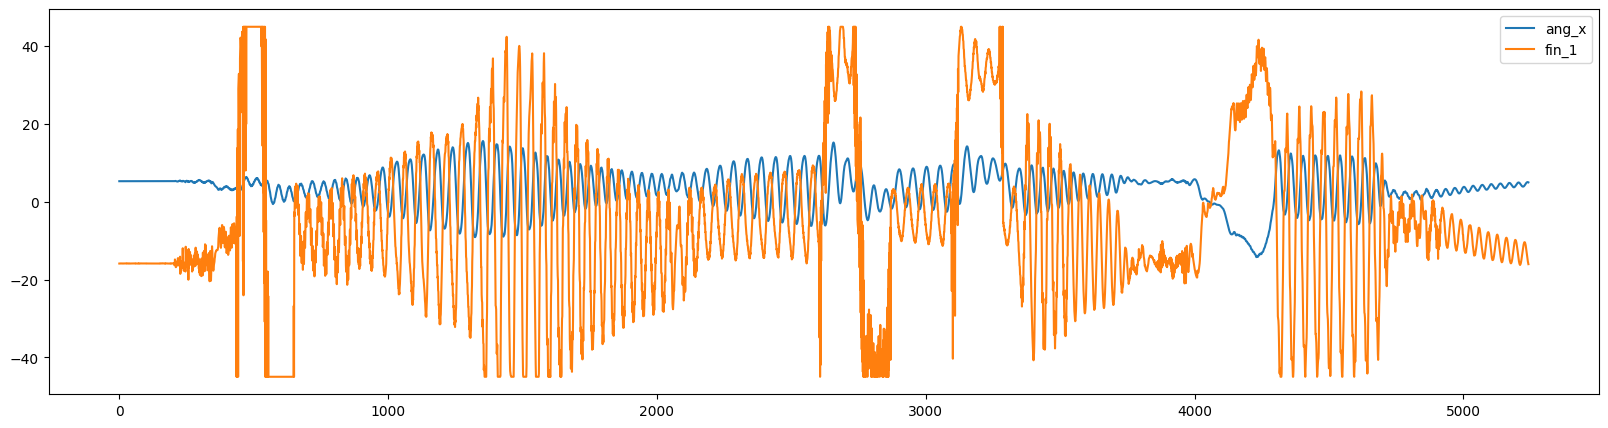

In [35]:
# ranges = 1200, 1600
ranges = 0, -1

plot_data = [
    [df_raw['ang_x'][ranges[0]:ranges[1]], 'ang_x'],
    [df_raw['fin_1'][ranges[0]:ranges[1]], 'fin_1'],
]

plt.figure(figsize=(20, 5))
for d, _ in plot_data:
    plt.plot(d)
    # plt.scatter(range(len(d)), d)
plt.legend([p[1] for p in plot_data])
plt.show()

In [32]:
# df = df_raw[ranges[0]:ranges[1]]
df = df_raw

correlation = df['ang_x'].corr(df['fin_1'])
print(f"The correlation coefficient between 'ang_x' and 'fin_1' is: {correlation}")

The correlation coefficient between 'ang_x' and 'fin_1' is: -0.3616946730116895


In [33]:
# Assuming equal length signals and even sampling rate
cross_correlation = np.correlate(df['ang_x'] - np.mean(df['ang_x']), 
                                 df['fin_1'] - np.mean(df['fin_1']), mode='full')

# The time lag that maximizes the cross-correlation
max_lag = np.argmax(cross_correlation) - (len(df['fin_1']) - 1)
print(f"The time lag that maximizes the cross-correlation is: {max_lag}")


The time lag that maximizes the cross-correlation is: 17


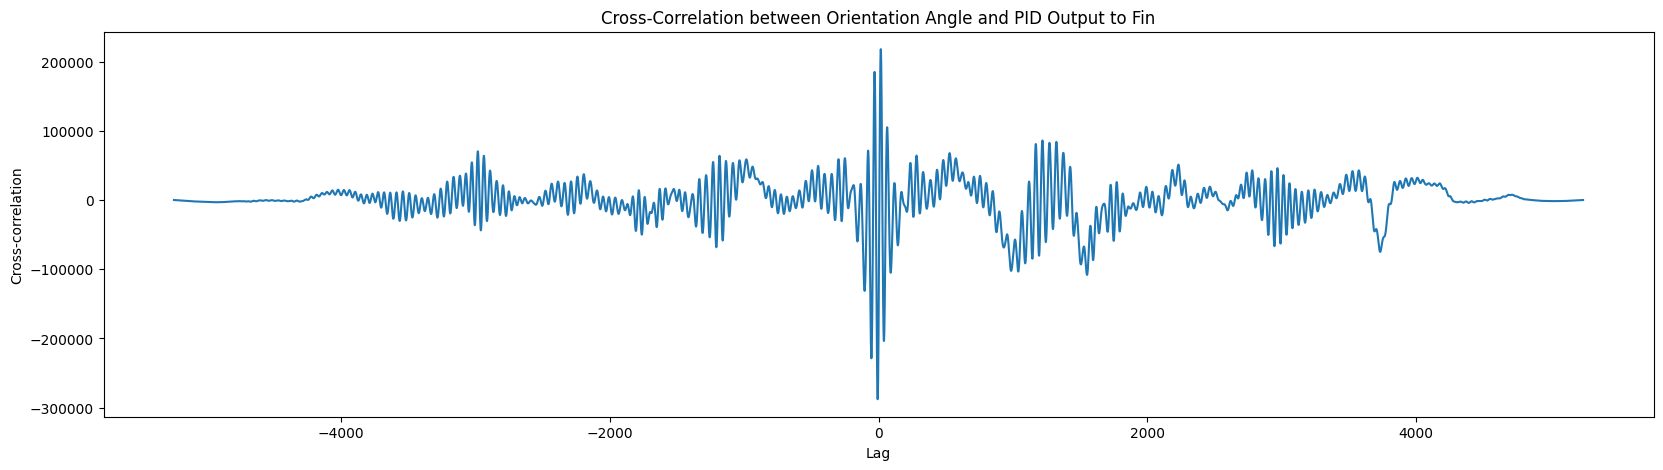

In [36]:
# Generate a range of lags equal to the cross-correlation size
lags = np.arange(-len(df['ang_x']) + 1, len(df['fin_1']))

# Plot the cross-correlation
plt.figure(figsize=(20, 5))
plt.plot(lags, cross_correlation)
plt.title('Cross-Correlation between Orientation Angle and PID Output to Fin')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.show()


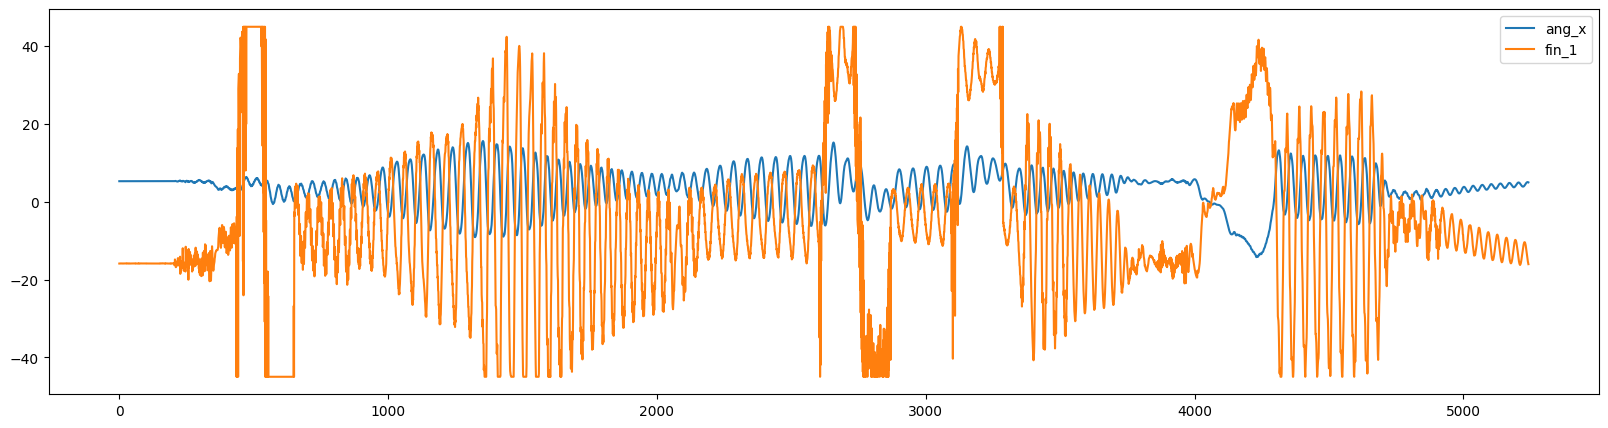

In [37]:
plt.figure(figsize=(20, 5))
for d, _ in plot_data:
    plt.plot(d)
    # plt.scatter(range(len(d)), d)
plt.legend([p[1] for p in plot_data])
plt.show()